![A soccer pitch for an international match.](soccer-pitch.jpg)

I am working as a sports journalist at a major online sports media company, specializing in football analysis and reporting. I've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but I'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official FIFA World Cup matches (not including qualifiers) since 2002-01-01.

I create two datasets containing the results of every official men's and women's international football match since the 19th century, which I scraped from a reliable online source. This data is stored in two CSV files: women_results.csv and men_results.csv.

The question I am trying to determine the answer to is:
The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

        p_val result
1 0.005196145 reject


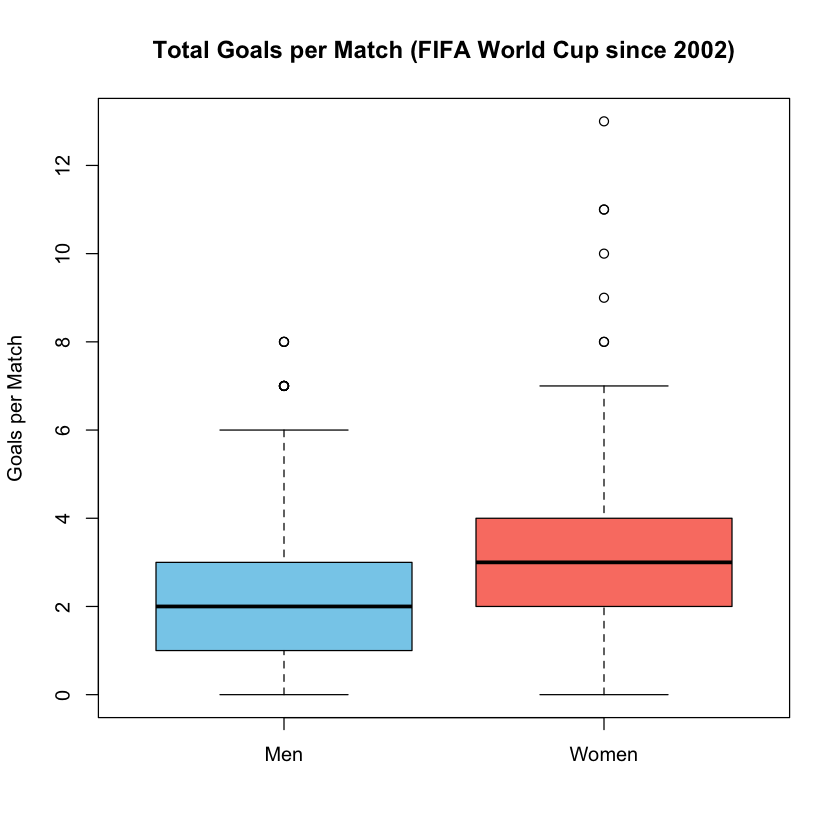

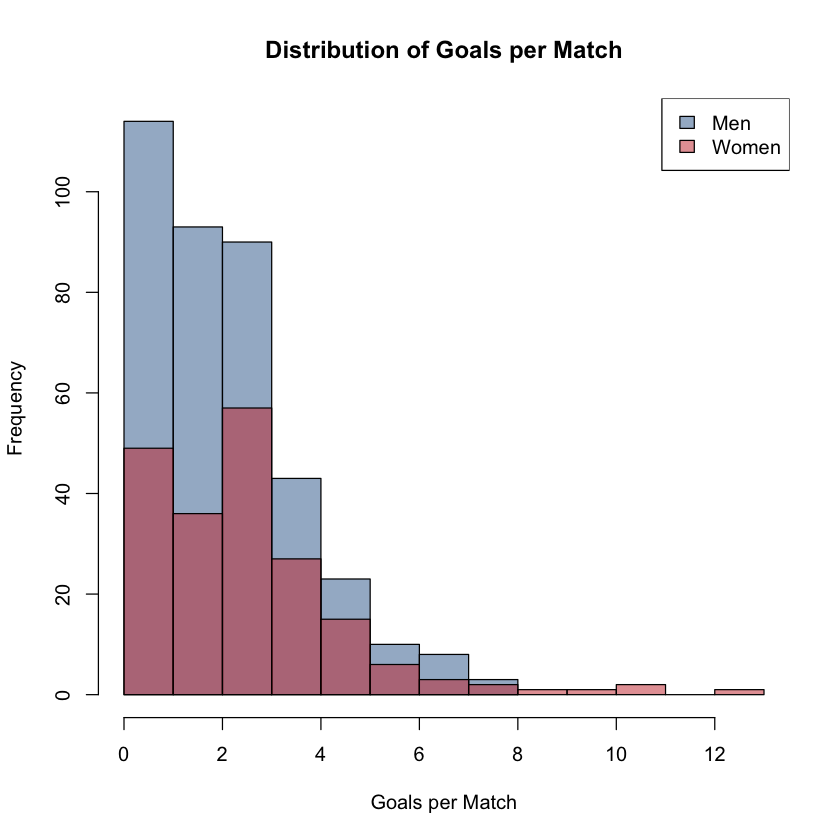

In [4]:
# Load required libraries
library(dplyr)

# --- Load datasets (adjust file paths if needed) ---
men <- read.csv("men_results.csv")
women <- read.csv("women_results.csv")

# --- Convert date column to Date type ---
men$date <- as.Date(men$date)
women$date <- as.Date(women$date)

# --- Filter for FIFA World Cup matches since 2002-01-01 ---
men_wc <- men %>%
  filter(tournament == "FIFA World Cup" & date >= as.Date("2002-01-01"))

women_wc <- women %>%
  filter(tournament == "FIFA World Cup" & date >= as.Date("2002-01-01"))

# --- Compute total goals per match ---
men_wc <- men_wc %>% mutate(total_goals = home_score + away_score)
women_wc <- women_wc %>% mutate(total_goals = home_score + away_score)

# --- Perform Welch’s two-sample t-test (two-sided) ---
test <- t.test(men_wc$total_goals, women_wc$total_goals, 
               alternative = "two.sided", var.equal = FALSE)

# --- Extract p-value ---
p_val <- test$p.value

# --- Apply decision rule at alpha = 0.10 ---
alpha <- 0.10
result <- ifelse(p_val < alpha, "reject", "fail to reject")

# --- Store in a data frame as required ---
result_df <- data.frame(p_val = p_val, result = result)

# --- Print result ---
print(result_df)

# --- Boxplot: Men vs Women Goals ---
boxplot(men_wc$total_goals, women_wc$total_goals,
        names = c("Men", "Women"),
        main = "Total Goals per Match (FIFA World Cup since 2002)",
        ylab = "Goals per Match",
        col = c("skyblue", "salmon"))

# --- Histogram overlay ---
hist(men_wc$total_goals, breaks = 10, col = rgb(0.2,0.4,0.6,0.5),
     xlim = c(0, max(c(men_wc$total_goals, women_wc$total_goals))),
     main = "Distribution of Goals per Match",
     xlab = "Goals per Match", ylab = "Frequency")
hist(women_wc$total_goals, breaks = 10, col = rgb(0.8,0.2,0.2,0.5), add = TRUE)
legend("topright", legend = c("Men", "Women"),
       fill = c(rgb(0.2,0.4,0.6,0.5), rgb(0.8,0.2,0.2,0.5)))

